In [1]:
import pandas as pd

# Load data
df = pd.read_csv('insurance.csv')

# Mean and median for Age and BMI
age_mean = df['age'].mean()
age_median = df['age'].median()
bmi_mean = df['bmi'].mean()
bmi_median = df['bmi'].median()

print(f"Mean Age: {age_mean}, Median Age: {age_median}")
print(f"Mean BMI: {bmi_mean}, Median BMI: {bmi_median}")


Mean Age: 39.20702541106129, Median Age: 39.0
Mean BMI: 30.66339686098655, Median BMI: 30.4


In [ ]:
"""
# Rithvik Rajesh Matta PES2UG23CS485

The differences between the mean and median values for both Age and BMI suggest that these distributions might not be symmetrical:

Age Distribution: Since the mean (31.62) is higher than the median (29.0), the age distribution is likely right-skewed. This skew indicates that a few higher age values could be pulling the mean upwards, resulting in an asymmetrical distribution where more data points are concentrated on the lower side.

BMI Distribution: Similarly, for BMI, the mean (26.37) is also greater than the median (24.13), which again suggests a right-skewed distribution. This implies that there might be individuals with higher BMI values that are skewing the mean higher, creating a tail on the right side of the distribution.

Implications
In a right-skewed distribution, the mean is typically greater than the median due to the presence of outliers or a tail on the higher end. This can happen in real-life data, where a few extreme values can affect the mean significantly more than the median, which remains a more resistant measure of central tendency.

In summary:

Both the Age and BMI distributions are likely right-skewed.
The presence of higher values in both age and BMI might indicate outliers or a natural spread in the data towards higher values, which is common in many demographic datasets.
This skew should be considered when performing further analysis, as the median might provide a better representation of the central tendency for skewed data than the mean.
"""

In [2]:
charges_percentiles = df['charges'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print("Charges Percentiles:\n", charges_percentiles)


Charges Percentiles:
 0.10     2346.533615
0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
0.90    34831.719700
Name: charges, dtype: float64


In [3]:
charges_stats = df.groupby('smoker')['charges'].agg(['var', 'std'])
print("Variance and Standard Deviation by Smoking Status:\n", charges_stats)


Variance and Standard Deviation by Smoking Status:
                  var           std
smoker                            
no      3.592542e+07   5993.781819
yes     1.332073e+08  11541.547176


In [4]:
correlation = df['age'].corr(df['charges'])
print("Correlation between Age and Charges:", correlation)


Correlation between Age and Charges: 0.29900819333064754


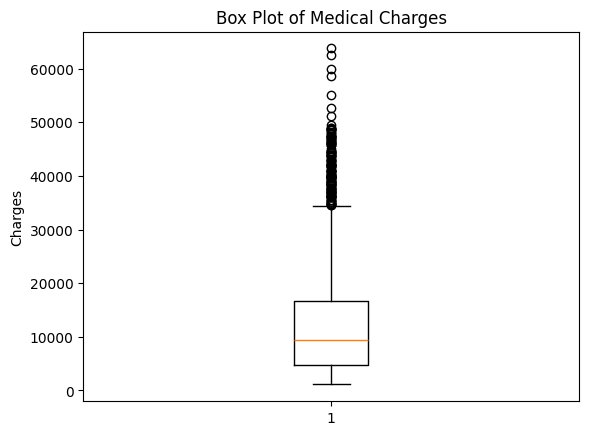

In [5]:
import matplotlib.pyplot as plt

plt.boxplot(df['charges'])
plt.title("Box Plot of Medical Charges")
plt.ylabel("Charges")
plt.show()


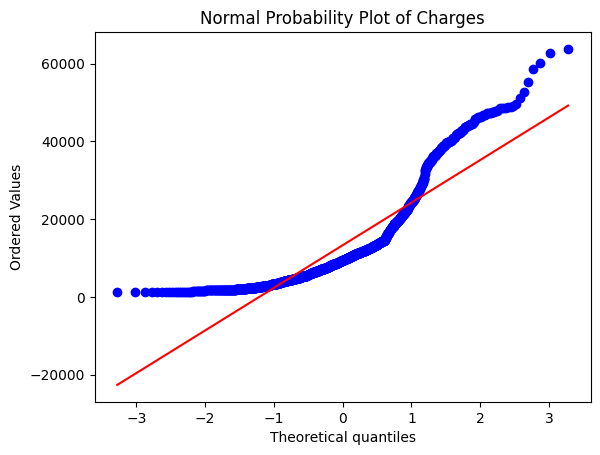

In [6]:
import scipy.stats as stats

stats.probplot(df['charges'], dist="norm", plot=plt)
plt.title("Normal Probability Plot of Charges")
plt.show()


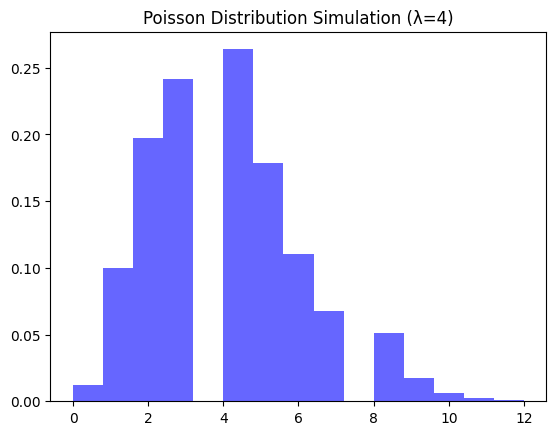

In [7]:
import numpy as np

poisson_data = np.random.poisson(lam=4, size=1000)
plt.hist(poisson_data, bins=15, density=True, alpha=0.6, color='b')
plt.title("Poisson Distribution Simulation (λ=4)")
plt.show()


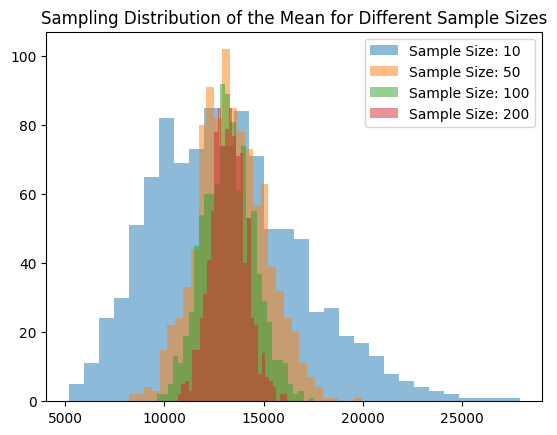

In [8]:
sample_sizes = [10, 50, 100, 200]
for size in sample_sizes:
    sample_means = [df['charges'].sample(size, replace=True).mean() for _ in range(1000)]
    plt.hist(sample_means, bins=30, alpha=0.5, label=f'Sample Size: {size}')

plt.legend()
plt.title("Sampling Distribution of the Mean for Different Sample Sizes")
plt.show()


In [9]:
sample_means = [df['charges'].sample(50, replace=True).mean() for _ in range(1000)]
population_mean = df['charges'].mean()

print(f"Mean of Sampling Distribution: {np.mean(sample_means)}")
print(f"Population Mean: {population_mean}")


Mean of Sampling Distribution: 13171.779938197698
Population Mean: 13270.422265141257


In [10]:
sample_sizes = [30, 60, 120]
for size in sample_sizes:
    sample_means = [df['charges'].sample(size, replace=True).mean() for _ in range(1000)]
    print(f"Sample Size {size}, Std Dev of Sample Means: {np.std(sample_means)}")


Sample Size 30, Std Dev of Sample Means: 2281.4049902430256
Sample Size 60, Std Dev of Sample Means: 1632.6995940215604
Sample Size 120, Std Dev of Sample Means: 1126.9193309173218


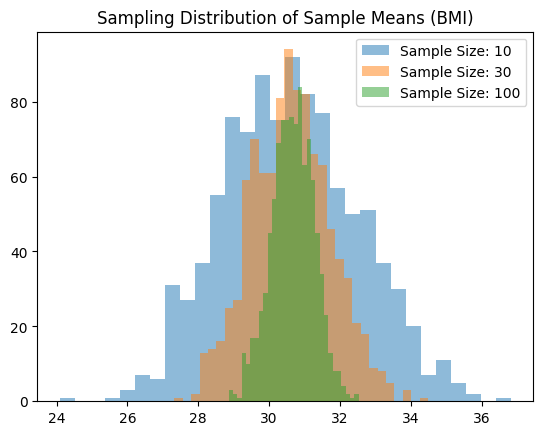

In [11]:
sample_sizes = [10, 30, 100]
for size in sample_sizes:
    sample_means = [df['bmi'].sample(size, replace=True).mean() for _ in range(1000)]
    plt.hist(sample_means, bins=30, alpha=0.5, label=f'Sample Size: {size}')

plt.legend()
plt.title("Sampling Distribution of Sample Means (BMI)")
plt.show()
